# Import library

In [98]:
# numerical
import numpy as np
from numpy.linalg import inv
from math import exp, sin

# plot
import matplotlib.pyplot as plt

# initialization

In [99]:
x = [0.1, 0.9, 1.9, 2.3, 3, 4.1, 5.2, 5.9, 6.8, 8.1, 8.7, 9.2, 10.1, 12]
y = [20, 24, 27, 29, 32, 37.3, 36.4, 32.4, 28.5, 30, 38, 43, 40, 32]

# 1. analytic method

## linear regression

In [100]:
# find coefficient a, b in y = ax + b
def linear_reg_analytic(x, y):
  dim = len(x)
  bias = np.ones(dim)
  b = [[k] for k in y]
  A = np.transpose(np.matrix([x, bias]))
  # AT * b
  tmp_m1 = np.matmul(np.transpose(A), b)
  # AT * A inverse
  tmp_m2 = inv(np.matmul(np.transpose(A), A))
  
  return np.matmul(tmp_m2, tmp_m1)

In [101]:
coef = linear_reg_analytic(x, y)
print("coefficient: ", coef)

coefficient:  [[ 1.16758943]
 [25.58412482]]


In [102]:
# plot
def plot_scatter_linear_reg(x, y, c):
  lin_x = np.linspace(0, 15, 1000)
  lin_y = np.transpose(c[0][0] * lin_x + c[1][0])
  plt.plot(lin_x, lin_y, linestyle='solid')
  plt.scatter(x, y, s = 5, c = "red")
  plt.title('analytic linear regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

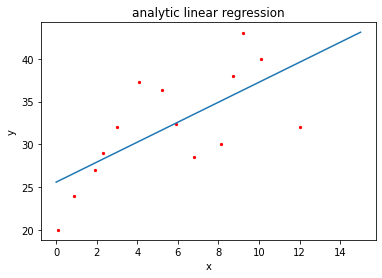

In [103]:
plot_scatter_linear_reg(x, y, coef)

## quadratic regression

In [104]:
# find coefficient a, b, c in y = ax^2 + bx + c
def quadratic_reg_analytic(x, y):
  dim = len(x)
  q = [k ** 2 for k in x]
  bias = np.ones(dim)
  b = [[k] for k in y]
  A = np.transpose(np.matrix([q, x, bias]))
  # AT * b
  tmp_m1 = np.matmul(np.transpose(A), b)
  # AT * A inverse
  tmp_m2 = inv(np.matmul(np.transpose(A), A))
  
  return np.matmul(tmp_m2, tmp_m1)

In [105]:
coef = quadratic_reg_analytic(x, y)
print("coefficient: ", coef)

coefficient:  [[-0.20687151]
 [ 3.56671928]
 [21.26212685]]


In [106]:
# plot
def plot_scatter_quadratic_reg(x, y, c):
  lin_x = np.linspace(0, 15, 1000)
  lin_y = np.transpose(c[0][0] * (lin_x ** 2) + c[1][0] * lin_x + c[2][0])
  plt.plot(lin_x, lin_y, linestyle='solid')
  plt.scatter(x, y, s = 5, c = "red")
  plt.title('analytic quadratic regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

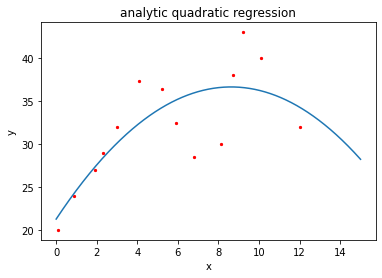

In [107]:
plot_scatter_quadratic_reg(x, y, coef)

# 2

## Fletcher-Reeves conjugate gradient method

In [108]:
# Fletcher-Reeves conjugate gradient method
def fletcher_reeves(x, y, c, gradient_func, find_min_func):
  n = 2
  ep = 0.1 ** 5
  history = [tuple(c)]
  p = c
  
  while True:
    s = -gradient_func(x, y, p)
    # find point minimize loss
    for i in range(0, n):
      # terminal condition
      if norm(s) < ep:
        history.append(tuple(p))
        return history
      # update s and p
      else:
        new_p = find_min_func(x, y, p, s)
        g = gradient_func(x, y, p)
        new_g = gradient_func(x, y, new_p)
        beta = np.inner(new_g, new_g) / np.inner(g, g)
        s = -gradient_func(x, y, new_p) + beta * s
        p = new_p
    # append updated point to history
    history.append(tuple(p))

# calculate norm
def norm(s):
  return sum(k ** 2 for k in s) ** 0.5

### linear regression

In [109]:
# test function
# plot loss function
def plot_loss(x, y, a, b, g, t):
  lin_x = np.linspace(-50, 50, 1000)
  lin_y = sum((j - ((a + g[0] * lin_x) * i + (b + g[1] * lin_x))) ** 2 for i, j in zip(x, y))
  plt.plot(lin_x, lin_y, linestyle='solid')
  plt.scatter([t], [0], s = 5, c = "red")
  plt.title('loss')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

In [110]:
# test function
# example function
def gradient(p):
  return np.array([4 * p[0] + 2 * p[1] + 1, 2 * p[0] + 2 * p[1] - 1])

def find_min(p, g):
  t1 = 4 * p[0] * g[0] + 2 * p[0] * g[1] + 2 * p[1] * g[0] + 2 * p[1] * g[1] + g[0] - g[1]
  t2 = 4 * g[0] ** 2 + 4 * g[0] * g[1] + 2 * g[1] ** 2
  t = -t1 / t2
  return np.array([p[0] + t * g[0], p[1] + t * g[1]])

In [111]:
# find min step size
step_size = 0

# loss function
def linear_loss(x, y, a, b):
  return sum((j - (a * i + b)) ** 2 for i, j in zip(x, y))

# calculate gradient at p
def linear_gradient(x, y, p):
  g = [sum(((p[0] * i + p[1]) - j) * 2 * i for i, j in zip(x, y)), sum(((p[0] * i + p[1]) - j) * 2 for i, j in zip(x, y))]
  return np.array(g)

# find point which gradient is zero
def find_min_linear(x, y, p, g):
  global step_size
  x = np.array(x)
  y = np.array(y)
  v1 = g[0] * x + g[1]
  v2 = y - (p[0] * x + p[1])
  t = np.inner(v1, v2) / np.inner(v1, v1)
  step_size = t
  return [p[0] + t * g[0], p[1] + t * g[1]]

In [112]:
coef = [0, 0]
history = fletcher_reeves(x, y, coef, linear_gradient, find_min_linear)
print("coefficient: ", history[-1])

coefficient:  (1.1675894318259736, 25.584124820573443)


### quadratic regression

In [113]:
# calculate gradient at p
def quadratic_gradient(x, y, p):
  x = np.array(x)
  y = np.array(y)
  x_2 = x ** 2
  g1 = sum((y - (p[0] * x_2 + p[1] * x + p[2])) * (-x_2))
  g2 = sum((y - (p[0] * x_2 + p[1] * x + p[2])) * (-x))
  g3 = sum((y - (p[0] * x_2 + p[1] * x + p[2])) * (-1))
  g = [g1, g2, g3]
  return np.array(g)

# find point which gradient is zero
def find_min_quadratic(x, y, p, g):
  global step_size
  x = np.array(x)
  y = np.array(y)
  x_2 = x ** 2
  v1 = g[0] * x_2 + g[1] * x + g[2]
  v2 = y - (p[0] * x_2 + p[1] * x + p[2])
  t = np.inner(v1, v2) / np.inner(v1, v1)
  step_size = t
  return [p[0] + t * g[0], p[1] + t * g[1], p[2] + t * g[2]]

In [114]:
coef = [0, 0, 0]
history = fletcher_reeves(x, y, coef, quadratic_gradient, find_min_quadratic)
print("coefficient: ", history[-1])

coefficient:  (-0.2068715270591417, 3.566719519205277, 21.26212616576684)


## Davidon-Fletcher-Powell (DFP) method

In [115]:
# gradient function and find minimum point function are the same as fletcher-reeves method
def DFP(x, y, p, gradient_func, find_min_func):
  cur = p
  history = [tuple(p)]
  ep = 0.1 ** 5
  B = np.matrix([[1, 0], [0, 1]])
  if len(p) == 3:
    B = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

  while True:
    df = gradient_func(x, y, cur)
    # terminate condition
    if norm(df) < ep:
      return history
    s = -np.matmul(df, B)
    # find the new step point
    new_cur = find_min_func(x, y, cur, s.tolist()[0])
    new_df = gradient_func(x, y, new_cur)
    history.append(tuple(new_cur))
    # terminate condition
    if norm(new_df) < ep:
      return history
    # update B
    global step_size
    g = new_df - df
    M = step_size * np.matmul(np.transpose(s), s) / np.inner(s.tolist()[0], g)
    Bg = np.matmul(g, B)
    N = -np.matmul(np.transpose(Bg), Bg) / np.inner(g, Bg.tolist()[0])
    B = B + M + N
    # update cur
    cur = new_cur

### linear regression

In [116]:
coef = [0, 0]
history = DFP(x, y, coef, linear_gradient, find_min_linear)
print("coefficient: ", history[-1])

coefficient:  (1.1675894318259492, 25.58412482057344)


### quadratic regression

In [117]:
coef = [0, 0, 0]
history = DFP(x, y, coef, quadratic_gradient, find_min_quadratic)
print("coefficient: ", history[-1])

coefficient:  (-0.20687150986009017, 3.5667192777743413, 21.26212684820319)


# 3

In [118]:
# calculate loss
def poly_loss(x, y, c, dim):
  loss = 0
  for i, j in zip(x, y):
    v = sum(c[k][0] * i ** (dim - k) for k in range(0, dim + 1))
    loss += (j - v) ** 2
  return loss

# determine the best dimension to minimize loss
def polynomial_reg_analytic(x, y, dim):
  x = np.array(x)
  y = np.array(y)
  poly_list = []
  for d in range(0, dim + 1):
    poly_list.append(x ** (dim - d))
  b = [[k] for k in y]
  A = np.transpose(np.matrix(poly_list))
  # AT * b
  tmp_m1 = np.matmul(np.transpose(A), b)
  # AT * A inverse
  tmp_m2 = inv(np.matmul(np.transpose(A), A))
  
  return np.matmul(tmp_m2, tmp_m1).tolist()

In [119]:
dim = 5
coef = polynomial_reg_analytic(x, y, dim)
print("coefficient: ", coef)

coefficient:  [[-0.007958267625928883], [0.22041661785195288], [-2.0577810650886477], [7.1128752246258955], [-4.0047551502739225], [21.078842604156307]]


In [120]:
# plot regression
def plot_scatter_poly_reg(x, y, c, dim):
  lin_x = np.linspace(0, 13, 1000)
  lin_y = np.transpose(sum(c[i][0] * lin_x ** (dim - i) for i in range(0, dim + 1)))
  plt.plot(lin_x, lin_y, linestyle='solid')
  plt.scatter(x, y, s = 5, c = "red")
  plt.title('analytic polynomial regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

# plot loss versus dimension
def loss_plot(title, history):
    plt.figure(figsize=(10,5))
    plt.plot(history, label = "1")
    plt.title(title)
    plt.xlabel("dimension")
    plt.ylabel("loss value")
    plt.show()

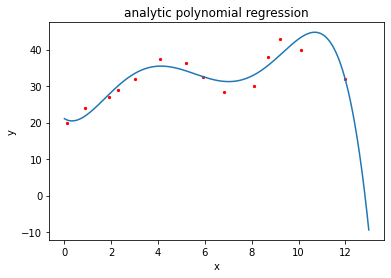

In [121]:
plot_scatter_poly_reg(x, y, coef, dim)

max dimension is 0, loss: 526.677143
max dimension is 1, loss: 284.494075
max dimension is 2, loss: 204.603356
max dimension is 3, loss: 202.440606
max dimension is 4, loss: 151.452310
max dimension is 5, loss: 71.945625
max dimension is 6, loss: 71.691420
max dimension is 7, loss: 17.856406
max dimension is 8, loss: 3.120671
max dimension is 9, loss: 1.781801
max dimension is 10, loss: 3.353092


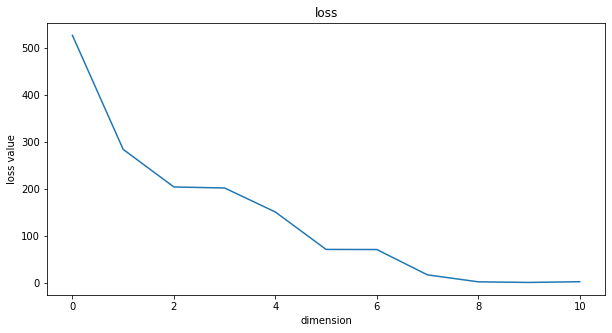

In [122]:
# measure loss in each dimension
history = []
max_dim = 11
for i in range(0, max_dim):
  coef = polynomial_reg_analytic(x, y, i)
  loss = poly_loss(x, y, coef, i)
  history.append(loss)
  print("max dimension is %d, loss: %f" % (i, loss))

# plot loss
loss_plot("loss", history)

## conclusion

the best dimension seems to be 9  
(to my best knowledge, the polynomial in dimension 13 should perfectly fit the data point, but uh oh, it fails.)

# 4

In [123]:
# basis of function
def my_exp(x):
  flist = []
  for i in x:
    flist.append(exp(-i))
  return np.array(flist)

def my_sin(x):
  x_scalar = 1.2
  y_scalar = 2
  x_move = 2.14
  y_move = 13
  flist = []
  for i in x:
    flist.append(sin((i + x_move) * x_scalar) * y_scalar + y_move)
  return np.array(flist)

flist_set = [my_exp, my_sin]

# calculate linear combination of function that best fits data
def mix_reg_analytic(x, y):
  global flist_set
  x = np.array(x)
  y = np.array(y)
  f_list = []
  for d in range(0, len(flist_set)):
    f_list.append(flist_set[d](x))
  b = [[k] for k in y]
  A = np.transpose(np.matrix(f_list))
  # AT * b
  tmp_m1 = np.matmul(np.transpose(A), b)
  # AT * A inverse
  tmp_m2 = inv(np.matmul(np.transpose(A), A))
  
  return np.matmul(tmp_m2, tmp_m1).tolist()

# calculate loss
def mix_loss(x, y, c):
  y = np.array(y)
  global flist_set
  return sum((y - sum(c[i][0] * flist_set[i](x) for i in range(len(flist_set)))) ** 2)

In [124]:
coef = mix_reg_analytic(x, y)
print("coefficient: ", coef)

coefficient:  [[-18.850025275073897], [2.662017641390047]]


In [125]:
# plot
def plot_scatter_mix_reg(x, y, c):
  global flist_set
  lin_x = np.linspace(0, 13, 1000)
  lin_y = np.transpose(sum(c[i][0] * flist_set[i](lin_x) for i in range(0, len(flist_set))))
  plt.plot(lin_x, lin_y, linestyle='solid')
  plt.scatter(x, y, s = 5, c = "red")
  plt.title('analytic polynomial regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

mix loss: 41.351048


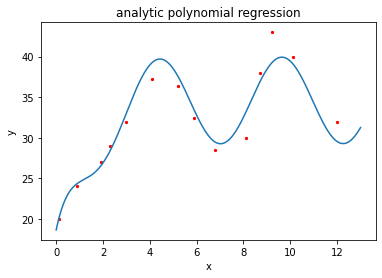

In [126]:
print("mix loss: %f" % (mix_loss(x, y, coef)))
plot_scatter_mix_reg(x, y, coef)